## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests

### Exploring Dataset

https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd

In [2]:
df=pd.read_csv("Incidents_Responded_to_by_Fire_Companies.csv")

/home/jak/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,63476768,2928.0,"746 - Carbon monoxide detector activation, no CO",06/30/2018 11:55:29 PM,07/01/2018 12:00:32 AM,2.0,07/01/2018 12:22:57 AM,11 - First Alarm,1648.0,"42 - HazMat detection, monitoring, sampling, &...",...,10453.0,2 - Bronx,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,63476763,1021.0,"300 - Rescue, EMS incident, other",06/30/2018 11:54:44 PM,06/30/2018 11:58:59 PM,1.0,07/01/2018 12:09:29 AM,11 - First Alarm,885.0,"00 - Action taken, other",...,11203.0,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63476761,2745.0,"651 - Smoke scare, odor of smoke",06/30/2018 11:54:13 PM,06/30/2018 11:58:29 PM,3.0,07/01/2018 12:07:50 AM,11 - First Alarm,817.0,"00 - Action taken, other",...,10456.0,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63476762,2135.0,"117 - Commercial Compactor fire, confined to r...",06/30/2018 11:54:08 PM,06/30/2018 11:58:53 PM,5.0,07/01/2018 12:19:16 AM,11 - First Alarm,1508.0,11 - Extinguishment by fire service personnel,...,10454.0,2 - Bronx,basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63476759,1877.0,"710 - Malicious, mischievous false call, other",06/30/2018 11:53:33 PM,06/30/2018 11:56:50 PM,1.0,06/30/2018 11:57:11 PM,11 - First Alarm,218.0,"00 - Action taken, other",...,11208.0,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extracting Raelevant Data
For our analysis of places in New York with high fire calls we require to extract 
* **ZIP_CODE** *(Zip code of the place)*
* **TOTAL_INCIDENT_DURATION** *(Time period for which the fire was not extinguisghed)*
* **INCIDENT_TYPE_DESC** *(Type of incident)* 
* **HIGHEST_LEVEL_DESC**
* **ACTION_TAKEN1_DESC** *(Action taken by the authority)*

In [4]:
data=df.loc[:,["ZIP_CODE","TOTAL_INCIDENT_DURATION","INCIDENT_TYPE_DESC","HIGHEST_LEVEL_DESC","ACTION_TAKEN1_DESC"]]
data.head()

,ZIP_CODE,TOTAL_INCIDENT_DURATION,INCIDENT_TYPE_DESC,HIGHEST_LEVEL_DESC,ACTION_TAKEN1_DESC
0,10453.0,1648.0,"746 - Carbon monoxide detector activation, no CO",11 - First Alarm,"42 - HazMat detection, monitoring, sampling, &..."
1,11203.0,885.0,"300 - Rescue, EMS incident, other",11 - First Alarm,"00 - Action taken, other"
2,10456.0,817.0,"651 - Smoke scare, odor of smoke",11 - First Alarm,"00 - Action taken, other"
3,10454.0,1508.0,"117 - Commercial Compactor fire, confined to r...",11 - First Alarm,11 - Extinguishment by fire service personnel
4,11208.0,218.0,"710 - Malicious, mischievous false call, other",11 - First Alarm,"00 - Action taken, other"


## Feature Engineering Dataset
This includes
* Dropping  incomplete data
* Normalisation
* Grouping the data by ZIP CODE

In [5]:
data = data.dropna(how='any',axis=0) 
data["ZIP_CODE"]= data["ZIP_CODE"].astype(int)
data["TOTAL_INCIDENT_DURATION"]= data["TOTAL_INCIDENT_DURATION"].astype(int)/max(data["TOTAL_INCIDENT_DURATION"].astype(int))

In [6]:
data11 = pd.get_dummies(data["INCIDENT_TYPE_DESC"], prefix="", prefix_sep="")
data22 = pd.get_dummies(data["HIGHEST_LEVEL_DESC"], prefix="", prefix_sep="")
data33 = pd.get_dummies(data["ACTION_TAKEN1_DESC"], prefix="", prefix_sep="")
dff=pd.concat([data11, data22,data33,data["ZIP_CODE"],data["TOTAL_INCIDENT_DURATION"]], axis=1)
dff.head()

,"100 - Fire, other",111 - Building fire,112 - Fires in structure other than in a building,"113 - Cooking fire, confined to container","114 - Chimney or flue fire, confined to chimney or flue","115 - Incinerator overload or malfunction, fire confined","116 - Fuel burner/boiler malfunction, fire confined","117 - Commercial Compactor fire, confined to rubbish","118 - Trash or rubbish fire, contained","120 - Fire in mobile prop. used as a fixed struc., other",...,82 - Notify other agencies.,83 - Provide information to public or media,84 - Refer to proper authority,85 - Enforce codes,86 - Investigate,87 - Investigate fire out on arrival,91 - Fill-in or moveup,93 - Cancelled en route,ZIP_CODE,TOTAL_INCIDENT_DURATION
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10453,0.000267
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11203,0.000143
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10456,0.000132
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,10454,0.000244
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11208,0.000035


In [7]:
dff1=dff.groupby(['ZIP_CODE']).sum()
dff1.head()

,"100 - Fire, other",111 - Building fire,112 - Fires in structure other than in a building,"113 - Cooking fire, confined to container","114 - Chimney or flue fire, confined to chimney or flue","115 - Incinerator overload or malfunction, fire confined","116 - Fuel burner/boiler malfunction, fire confined","117 - Commercial Compactor fire, confined to rubbish","118 - Trash or rubbish fire, contained","120 - Fire in mobile prop. used as a fixed struc., other",...,812 - Assigned sector commander,82 - Notify other agencies.,83 - Provide information to public or media,84 - Refer to proper authority,85 - Enforce codes,86 - Investigate,87 - Investigate fire out on arrival,91 - Fill-in or moveup,93 - Cancelled en route,TOTAL_INCIDENT_DURATION
ZIP_CODE,,,,,,,,,,,,,,,,,,,,,
10001,25.0,26.0,21.0,112.0,2.0,0.0,30.0,10.0,55.0,0.0,...,1.0,106.0,0.0,2.0,0.0,2006.0,3.0,2.0,84.0,2.185813
10002,23.0,47.0,27.0,440.0,1.0,4.0,33.0,41.0,52.0,0.0,...,0.0,189.0,1.0,7.0,1.0,1756.0,1.0,0.0,128.0,3.255216
10003,15.0,31.0,23.0,239.0,0.0,0.0,54.0,5.0,62.0,0.0,...,0.0,147.0,0.0,3.0,0.0,2229.0,1.0,0.0,131.0,2.008616
10004,9.0,5.0,11.0,28.0,0.0,0.0,0.0,1.0,11.0,0.0,...,0.0,24.0,0.0,0.0,0.0,562.0,2.0,0.0,18.0,0.441220
10005,8.0,5.0,8.0,36.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,20.0,0.0,0.0,0.0,445.0,3.0,0.0,33.0,0.341890


## Applying K Means for clustering the Data

In [8]:
from sklearn.cluster import KMeans
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dff1)
kmeans.labels_

array([1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 2], dtype=int32)

**Each Category shows the proness to fire.**
* *Category-0 is most prone to fire cases*
* *Category-1 is least prone to fire cases*

In [9]:
dff1.insert(0, 'Cluster Labels', kmeans.labels_)
dff1.head()

,Cluster Labels,"100 - Fire, other",111 - Building fire,112 - Fires in structure other than in a building,"113 - Cooking fire, confined to container","114 - Chimney or flue fire, confined to chimney or flue","115 - Incinerator overload or malfunction, fire confined","116 - Fuel burner/boiler malfunction, fire confined","117 - Commercial Compactor fire, confined to rubbish","118 - Trash or rubbish fire, contained",...,812 - Assigned sector commander,82 - Notify other agencies.,83 - Provide information to public or media,84 - Refer to proper authority,85 - Enforce codes,86 - Investigate,87 - Investigate fire out on arrival,91 - Fill-in or moveup,93 - Cancelled en route,TOTAL_INCIDENT_DURATION
ZIP_CODE,,,,,,,,,,,,,,,,,,,,,
10001,1,25.0,26.0,21.0,112.0,2.0,0.0,30.0,10.0,55.0,...,1.0,106.0,0.0,2.0,0.0,2006.0,3.0,2.0,84.0,2.185813
10002,2,23.0,47.0,27.0,440.0,1.0,4.0,33.0,41.0,52.0,...,0.0,189.0,1.0,7.0,1.0,1756.0,1.0,0.0,128.0,3.255216
10003,1,15.0,31.0,23.0,239.0,0.0,0.0,54.0,5.0,62.0,...,0.0,147.0,0.0,3.0,0.0,2229.0,1.0,0.0,131.0,2.008616
10004,0,9.0,5.0,11.0,28.0,0.0,0.0,0.0,1.0,11.0,...,0.0,24.0,0.0,0.0,0.0,562.0,2.0,0.0,18.0,0.441220
10005,0,8.0,5.0,8.0,36.0,0.0,0.0,0.0,0.0,5.0,...,0.0,20.0,0.0,0.0,0.0,445.0,3.0,0.0,33.0,0.341890


## Using dataset to extract coordinates of places

In [10]:
zipcode=pd.read_csv("Zip_Codes_Government_Data.csv")
zipcode.rename({'ZIP': 'ZIP_CODE'}, axis='columns', inplace=True)
data_df = pd.merge(dff1,zipcode,left_index=True,right_on="ZIP_CODE")
data_df.head()

,Cluster Labels,"100 - Fire, other",111 - Building fire,112 - Fires in structure other than in a building,"113 - Cooking fire, confined to container","114 - Chimney or flue fire, confined to chimney or flue","115 - Incinerator overload or malfunction, fire confined","116 - Fuel burner/boiler malfunction, fire confined","117 - Commercial Compactor fire, confined to rubbish","118 - Trash or rubbish fire, contained",...,84 - Refer to proper authority,85 - Enforce codes,86 - Investigate,87 - Investigate fire out on arrival,91 - Fill-in or moveup,93 - Cancelled en route,TOTAL_INCIDENT_DURATION,ZIP_CODE,LAT,LNG
2569,1,25.0,26.0,21.0,112.0,2.0,0.0,30.0,10.0,55.0,...,2.0,0.0,2006.0,3.0,2.0,84.0,2.185813,10001,40.750633,-73.997177
2570,2,23.0,47.0,27.0,440.0,1.0,4.0,33.0,41.0,52.0,...,7.0,1.0,1756.0,1.0,0.0,128.0,3.255216,10002,40.715775,-73.986212
2571,1,15.0,31.0,23.0,239.0,0.0,0.0,54.0,5.0,62.0,...,3.0,0.0,2229.0,1.0,0.0,131.0,2.008616,10003,40.731829,-73.989181
2572,0,9.0,5.0,11.0,28.0,0.0,0.0,0.0,1.0,11.0,...,0.0,0.0,562.0,2.0,0.0,18.0,0.441220,10004,40.688630,-74.018244
2573,0,8.0,5.0,8.0,36.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,445.0,3.0,0.0,33.0,0.341890,10005,40.706027,-74.008835


## Maping Data using Folium

In [11]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
map_clusters = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(data_df['LAT'], data_df['LNG'], data_df['Cluster Labels']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Client details for using FOURSQUARE API

In [12]:
CLIENT_ID = '2JHMQCZSBYWTAZBYCXN4HAXCJ4MHJ0CRJ3LT3KAJSHAXOGGW' # your Foursquare ID
CLIENT_SECRET = 'EHFK1W4Q5L53EDSSBVACC3ZTN3AQSR13B5HIEAX5WRNEAVAC' # your Foursquare Secret
VERSION = '20190703' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2JHMQCZSBYWTAZBYCXN4HAXCJ4MHJ0CRJ3LT3KAJSHAXOGGW
CLIENT_SECRET:EHFK1W4Q5L53EDSSBVACC3ZTN3AQSR13B5HIEAX5WRNEAVAC


## Formimg a Dataset of all the food joints in a given area

This is done to count the number of food joints and observe if more fire cases are related to it.

In [13]:
def getNearbyVenues(cluster,zipcode,latitudes, longitudes, radius=500):
    limit=200
    venues_list=[]
    for lat, lng in zip( latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&LIMIT={}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            limit,
            radius
            )  
        # make the GET request
        results = len(requests.get(url).json()["response"]["venues"])
        
        # return only relevant information for each nearby venue
        venues_list.append(results)
    data={
        "ZIPCODE":zipcode,
        "Number_of_Food_Joints":venues_list,
        "Cluster Labels":cluster
    }
    nearby_venues = pd.DataFrame(data)

    print("Finished!")
    
    return(nearby_venues)

In [14]:
nyc_venues = getNearbyVenues(cluster=data_df['Cluster Labels'],
                                zipcode=data_df['ZIP_CODE'],
                                latitudes=data_df['LAT'],
                                 longitudes=data_df['LNG'],
                                 radius = 500
                                )
nyc_venues.head()

Finished!


,ZIPCODE,Number_of_Food_Joints,Cluster Labels
2569,10001,30,1
2570,10002,30,2
2571,10003,30,1
2572,10004,25,0
2573,10005,30,0


## Final Dataset

In [15]:
nyc_venues=nyc_venues.drop(["ZIPCODE"],1)
new=nyc_venues.groupby(['Cluster Labels']).sum()
new.reset_index(inplace=True)
new.head()

,Cluster Labels,Number_of_Food_Joints
0,0,2051
1,1,2031
2,2,518


## Plotting the Data

['Category 0', 'Category 1', 'Category 2']


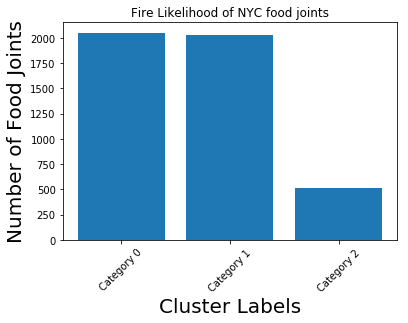

In [17]:
import matplotlib.pyplot as plt
p=[]
for i in new["Cluster Labels"]:
    p.append("Category "+str(i))
print(p)
plt.bar(new["Cluster Labels"],new["Number_of_Food_Joints"])
plt.xlabel('Cluster Labels', fontsize=20)
plt.ylabel('Number of Food Joints', fontsize=20)
plt.xticks(new["Cluster Labels"],p,fontsize=10, rotation=45)
plt.title('Fire Likelihood of NYC food joints')
plt.show()